# Setup

In [26]:
# Common packages
from pandas import read_csv, concat, DataFrame
from matplotlib import pyplot as plt
from numpy import std, mean, array, median, linspace

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Render figures inline
%matplotlib inline

# Get the data

The data can be downloaded from https://www.kaggle.com/datasets/zalando-research/fashionmnist.

In [2]:
data = read_csv("fashion-mnist_train.csv")

In [3]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
data["label"].value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

In [6]:
data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[: , 1:], data.iloc[: , 0], test_size = 0.2, random_state = 42)

# Data exploration

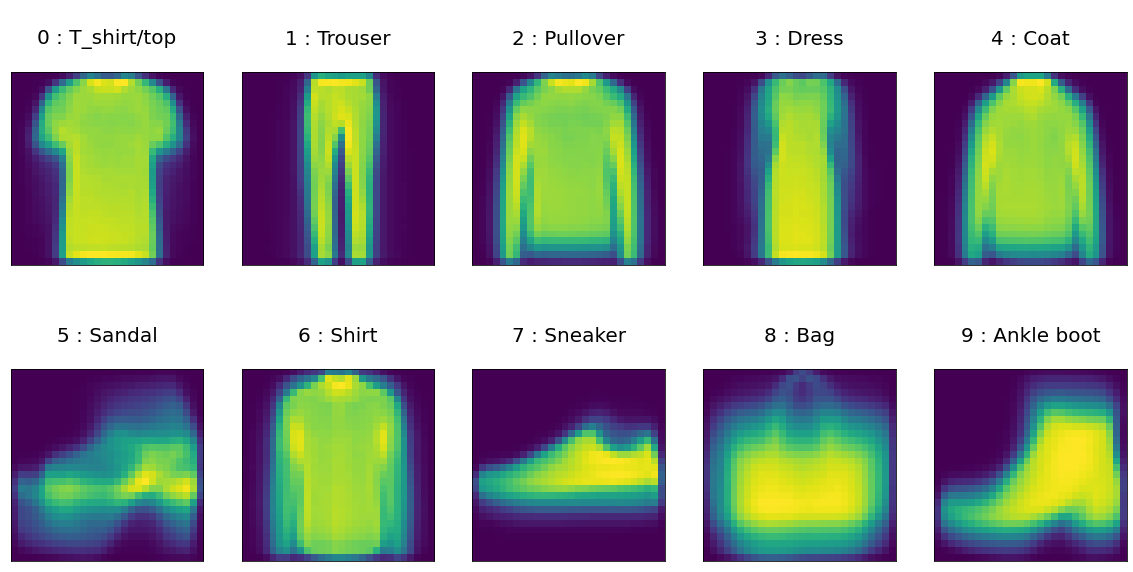

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize = (20, 10))
for label in y_train.unique():
    filtered_data = X_train[y_train == label]
    filtered_data = filtered_data.aggregate(func = mean, axis = 0)
    filtered_data = array(filtered_data, dtype = "float32")
    plt.subplot(2, 5, label + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(filtered_data.reshape((28, 28)))
    plt.title("\n" + str(label) + " : " + class_names[label] + "\n", fontsize = 20)
plt.show()

# Prepare the data

In [9]:
# Fit a principal component analysis
pca = PCA()
pca.fit(array(X_train))

PCA()

In [11]:
# How many principal components there are
n_components = len(pca.explained_variance_ratio_)

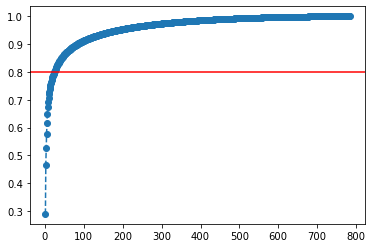

In [12]:
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.axhline(0.8, c = 'r')
plt.show()

In [13]:
# About 80% of variance explained by first 25 components
pca = PCA(n_components = 25)
pca.fit(array(X_train))

PCA(n_components=25)

In [14]:
# Save the pca values in a their own array
X_train_scores = pca.transform(array(X_train))

In [15]:
# Scale the values using min max
X_train_scaled = MinMaxScaler().fit_transform(X_train_scores)

In [16]:
pca = PCA(n_components = 25)
pca.fit(array(X_test))

PCA(n_components=25)

In [17]:
# Save the pca values in a their own array
X_test_scores = pca.transform(array(X_test))

In [18]:
# Scale the values using min max
X_test_scaled = MinMaxScaler().fit_transform(X_test_scores)

# Naive Bayes

In [19]:
# Train a MNB classifier
model = MultinomialNB()
model.fit(X_train_scaled, y_train)
print("Test score: ", model.score(X_test_scaled, y_test))

Test score:  0.6008333333333333


In [20]:
# Evaluate the results
print(classification_report(y_test, model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1232
           1       0.99      0.87      0.92      1174
           2       0.32      0.44      0.37      1200
           3       0.73      0.79      0.76      1242
           4       0.57      0.60      0.58      1185
           5       0.53      0.80      0.64      1141
           6       0.35      0.13      0.19      1243
           7       0.74      0.79      0.76      1224
           8       0.80      0.82      0.81      1149
           9       0.00      0.00      0.00      1210

    accuracy                           0.60     12000
   macro avg       0.57      0.60      0.58     12000
weighted avg       0.57      0.60      0.58     12000



In [21]:
# Set up the naive bayes pipeline
pipeline = Pipeline([
    ("mnb", MultinomialNB())
])

In [22]:
# Set up the grid search params
grid_params = {
  "mnb__alpha": linspace(0.5, 1.5, 3),
  'mnb__fit_prior': [True, False],
}

In [23]:
# Train model
grid = GridSearchCV(pipeline, grid_params)
grid.fit(X_train_scaled, y_train)
predictions = grid.predict(X_test_scaled)
print("Train Score = ", grid.best_score_)
print("Test Score = ", accuracy_score(y_test, predictions))
print("Best Params = ", grid.best_params_)

Train Score =  0.7276666666666667
Test Score =  0.6009166666666667
Best Params =  {'mnb__alpha': 0.5, 'mnb__fit_prior': True}


# K Nearest Neighbors

In [27]:
# Train a KNN classifier
for k in [5, 11, 17, 25, 33, 39]:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train_scaled, y_train)
    print("Test score: ", model.score(X_test_scaled, y_test))

Test score:  0.6145833333333334
Test score:  0.6284166666666666
Test score:  0.6329166666666667
Test score:  0.6341666666666667
Test score:  0.6353333333333333
Test score:  0.6345833333333334


# Conclusion

What is the accuracy of each method?

The naive bayes model scored about 60% accuracy on the test data and the k nearest neighbors scored about 62% accuracy on the test data.

What are the trade-offs of each approach?
The naive bayes model is a little bit more complicated than the k nearest neighbors model. The k nearest neighbor model is interpretable and easy to explain. Naive bayes I think can also be a little bit more susceptible to over training. The model that I developed was a little bit overtrained compared to the k nearest which was not over trained.

What is the compute performance of each approach?
Naive bayes was faster than the k nearest neighbors, but they were both pretty fast. I did reduce the dimensionality of the data using principal component analysis which helped reduce the processing time of both.